In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from pathlib import Path
import joblib
from joblib import dump
import pickle

In [3]:
# SET PROJECT ROOT
PROJECT_ROOT = Path().resolve().parent

# SET DATA DIRECTORY
DATA_DIR = PROJECT_ROOT / "data"

# SET EDA DIRECTORY
EDA_DIR = DATA_DIR / "eda_data"

# Import all eda data files
EDA_2019_DF = pd.read_csv(EDA_DIR / "edaData_2019.csv")
EDA_2021_DF = pd.read_csv(EDA_DIR / "edaData_2021.csv")
EDA_2022_DF = pd.read_csv(EDA_DIR / "edaData_2022.csv")
EDA_2023_DF = pd.read_csv(EDA_DIR / "edaData_2023.csv")
EDA_2024_DF = pd.read_csv(EDA_DIR / "edaData_2024.csv")
EDA_2025_DF = pd.read_csv(EDA_DIR / "edaData_2025.csv")
EDA_AllSeasons_DF = pd.read_csv(EDA_DIR / "edaData_AllSeasons.csv")

In [4]:
# One Hot Encoding for 'conference' column
"""
allConferences = ['southland', 'mwc', 'mac', 'sec', 'swac', 'aec', 'patriot',
       'sun_belt', 'pac_twelve', 'ovc', 'wcc', 'big_twelve', 'meac',
       'acc', 'mvc', 'ivy', 'nec', 'big_east', 'wac', 'big_west',
       'big_south', 'maac', 'caa', 'cusa', 'southern', 'aac', 'horizon',
       'a_ten', 'summit', 'big_sky', 'a_sun', 'big_ten']
       """

# Function to one hot encode 'conference' column
"""
def one_hot_encode_conference(df):
    for conference in allConferences:
        df[f'is_{conference}'] = np.where(df['conference'] == conference, 1, 0)
    return df
"""

"\ndef one_hot_encode_conference(df):\n    for conference in allConferences:\n        df[f'is_{conference}'] = np.where(df['conference'] == conference, 1, 0)\n    return df\n"

### Dashboard Table 1:

Table Name: Conference–Season table	                            	           
Grain: One row per (conference, season)		   
Key Columns: conference, season
Measures/Features: Average pace (avg_tempo_mean, avg_tempo_std)


Purpose:
- See pace (tempo) as “dependent” vs. win%: correlation or regression slope on a conference level		
- Average win%, average efficiencies, style metrics (e.g. 3-pt rate, TO rate)

In [5]:
EDA_AllSeasons_DF.columns

Index(['season', 'team_id', 'team_name', 'conference', 'games_played', 'wins',
       'win_pct', 'avg_fgm', 'avg_fga', 'avg_fgm3', 'avg_fga3', 'avg_ftm',
       'avg_fta', 'avg_orb', 'avg_drb', 'avg_ast', 'avg_to', 'avg_stl',
       'avg_blk', 'avg_pf', 'avg_pts_for', 'avg_pts_ag', 'coach_change',
       'avgHeightOnCourt_MinutesWeighted',
       'avgHeightOnCourt_MinutesWeighted_Rank', 'avgCenterHeight',
       'avgCenterHeight_Rank', 'avgPowerForwardHeight',
       'avgPowerForwardHeight_Rank', 'avgSmallForwardHeight',
       'avgSmallForwardHeight_Rank', 'avgShootingGuardHeight',
       'avgShootingGuardHeight_Rank', 'avgPointGuardHeight',
       'avgPointGuardHeight_Rank', 'heightEfficiencyRating',
       'heightEfficiencyRating_Rank', 'avgYearsOfExperience',
       'avgYearsOfExperience_Rank', 'avgBenchPoints', 'avgBenchPoints_Rank',
       'avgCenterPoints', 'avgCenterPoints_Rank', 'avgPowerForwardPoints',
       'avgPowerForwardPoints_Rank', 'avgSmallForwardPoints',
       'avgS

In [6]:
CONFSEASONS_DF = (
    EDA_AllSeasons_DF
    .groupby(['conference','season'])
    .agg(
      avg_tempo_mean = ('raw_tempo_rating','mean'),
      avg_tempo_std  = ('raw_tempo_rating','std'),
      avg_win_pct    = ('win_pct','mean'),
      tempo_win_corr = ('raw_tempo_rating',
        lambda x: x.corr(EDA_AllSeasons_DF.loc[x.index,'win_pct']))
    )
    .reset_index()
)
CONFSEASONS_DF.sort_values(['season','conference'], inplace=True)
CONFSEASONS_DF

/Users/sathyabalakumar/anaconda3/envs/MyUIUCProjectDashboard/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/sathyabalakumar/anaconda3/envs/MyUIUCProjectDashboard/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/sathyabalakumar/anaconda3/envs/MyUIUCProjectDashboard/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,conference,season,avg_tempo_mean,avg_tempo_std,avg_win_pct,tempo_win_corr
0,a_sun,2019,70.722222,2.731656,0.436688,-0.257295
6,a_ten,2019,67.542857,1.550044,0.509967,-0.088506
12,aac,2019,69.175000,2.715988,0.578145,-0.417326
18,acc,2019,68.200000,3.521582,0.604093,0.032166
24,aec,2019,66.911111,2.093110,0.439190,0.302499
...,...,...,...,...,...,...
167,summit,2025,69.100000,2.673013,0.453634,0.238025
173,sun_belt,2025,67.214286,2.421651,0.467134,-0.066042
179,swac,2025,69.383333,2.249781,0.344415,0.021745
185,wac,2025,68.955556,1.669664,0.452787,0.507348


In [7]:
# EDA ON AllSeasons DataFrame
EDA_AllSeasons_DF_test = EDA_AllSeasons_DF.copy()   
EDA_AllSeasons_DF_test.columns

Index(['season', 'team_id', 'team_name', 'conference', 'games_played', 'wins',
       'win_pct', 'avg_fgm', 'avg_fga', 'avg_fgm3', 'avg_fga3', 'avg_ftm',
       'avg_fta', 'avg_orb', 'avg_drb', 'avg_ast', 'avg_to', 'avg_stl',
       'avg_blk', 'avg_pf', 'avg_pts_for', 'avg_pts_ag', 'coach_change',
       'avgHeightOnCourt_MinutesWeighted',
       'avgHeightOnCourt_MinutesWeighted_Rank', 'avgCenterHeight',
       'avgCenterHeight_Rank', 'avgPowerForwardHeight',
       'avgPowerForwardHeight_Rank', 'avgSmallForwardHeight',
       'avgSmallForwardHeight_Rank', 'avgShootingGuardHeight',
       'avgShootingGuardHeight_Rank', 'avgPointGuardHeight',
       'avgPointGuardHeight_Rank', 'heightEfficiencyRating',
       'heightEfficiencyRating_Rank', 'avgYearsOfExperience',
       'avgYearsOfExperience_Rank', 'avgBenchPoints', 'avgBenchPoints_Rank',
       'avgCenterPoints', 'avgCenterPoints_Rank', 'avgPowerForwardPoints',
       'avgPowerForwardPoints_Rank', 'avgSmallForwardPoints',
       'avgS

## Keep these columns

### Pace

- raw_tempo_rating (or adjusted_tempo_rating)

Rationale: Captures how fast a team plays.

### Scoring Profile

- three_point_share_offense

- two_point_share_offense

- ft_point_share_offense

Why: Together they show whether a team is 3-ball heavy, drives/paint-oriented, or foul-line dependent.

### Efficiency

- adjusted_offensive_efficiency_rating

- adjusted_defensive_efficiency_rating

Rationale: Measures points per 100 possessions on each end—critical for distinguishing high-efficiency half-court teams from “brute force” style squads.

### Possession Outcomes

- avg_to (turnovers per game)

- avg_orb (offensive rebounds per game)

- avg_drb (defensive rebounds per game)

Rationale: Captures how well a team takes care of the ball and crashes the glass.

## Drop these from clustering

### Identifiers & Keys

- season, team_id, team_name, conference

Rationale: Not numeric performance features; will use these later for filtering and labeling.

### Redundant “Rank” Variants

- Any *_Rank column (e.g. avgCenterHeight_Rank, raw_tempo_rating_rank, etc.)

Rationale: Ranks are just ordinal transforms of the raw numbers—don’t double-count the same information.

### Highly Correlated Duplicates

- If choose raw_tempo_rating, drop adjusted_tempo_rating (or vice versa).

- If include adjusted_offensive_efficiency_rating, omit raw_offensive_efficiency_rating.

Rationale: Keeps your feature set compact and avoids multicollinearity.

### Minute-Weighted Heights & Subsplits

- avgHeightOnCourt_MinutesWeighted, avgCenterHeight, … position-by-position height/point splits

Rationale: Useful for deeper analysis, but you don’t need 5 separate height or points-by-position metrics in your playstyle clusters—stick to style on the ball, not roster construction.

### Experience Columns

- avgYearsOfExperience

Rationale: Useful to know if veteran squads perform differently vs how younger teams play

### Box-score Averages I won’t use

Since short on time, also drop:

- avg_fgm, avg_fga, avg_fgm3, avg_fga3, avg_ftm, avg_fta (scoring rate is already captured in share metrics)
- avg_pf (fouls) and avg_blk, avg_stl (defense style is better summarized by adjusted defense rating)

In [8]:
features_for_clustering = [
    'raw_tempo_rating',            # pace
    'three_point_share_offense',   # 3PT focus
    'two_point_share_offense',     # paint focus
    'ft_point_share_offense',      # free-throw reliance
    'adjusted_offensive_efficiency_rating',
    'three_point_share_defense', # Similarly for defense
    'two_point_share_defense',
    'ft_point_share_defense', 
    'adjusted_defensive_efficiency_rating',
    'avg_to',
    'avg_orb',
    'avg_drb',
    'avgYearsOfExperience'
]

In [9]:
# Cluster teams based on playstyle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Select the rows & features, dropping NaNs
df_clust = EDA_AllSeasons_DF_test[features_for_clustering]
df_clust_clean = df_clust.dropna()

# 2. Keep the original indices
clean_idx = df_clust_clean.index

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust_clean)

# 4. Run K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 5. Assign labels back to the original DataFrame
EDA_AllSeasons_DF_test.loc[clean_idx, 'playstyle'] = labels.astype(str)

# 6. Verify
print(EDA_AllSeasons_DF_test.loc[clean_idx, ['team_name','conference','playstyle']])

              team_name conference playstyle
0     abilene christian  southland         2
1             air force        mwc         0
2                 akron        mac         1
3               alabama        sec         1
4           alabama a&m       swac         4
...                 ...        ...       ...
2201            wyoming        mwc         3
2202             xavier   big_east         2
2203               yale        ivy         0
2204               yale        ivy         0
2205     youngstown st.    horizon         3

[2187 rows x 3 columns]


In [10]:
# 1.1 Grab the scaled centroids
scaled_centroids = kmeans.cluster_centers_

# 1.2 Reverse the scaling to get centroids in original units
centroids = scaler.inverse_transform(scaled_centroids)

# 1.3 Build a DataFrame for easy viewing
centroid_df = pd.DataFrame(
    centroids,
    columns=features_for_clustering
).assign(cluster=lambda d: d.index.astype(str))

centroid_df

,raw_tempo_rating,three_point_share_offense,two_point_share_offense,ft_point_share_offense,adjusted_offensive_efficiency_rating,three_point_share_defense,two_point_share_defense,ft_point_share_defense,adjusted_defensive_efficiency_rating,avg_to,avg_orb,avg_drb,avgYearsOfExperience,cluster
0,67.631019,34.882303,47.832440,17.284652,105.355787,35.333712,47.727718,16.937733,106.529167,11.409562,7.879961,23.553778,1.774760,0
1,70.831250,30.883440,49.631022,19.484675,105.645109,30.943521,49.734090,19.321961,101.704620,13.336537,10.161341,25.401057,1.725267,1
2,67.690929,30.363855,51.291468,18.344157,112.201296,30.463332,51.414697,18.120994,98.384881,10.738135,8.889968,24.058394,2.158198,2
3,68.128458,33.493607,48.841478,17.664287,100.880830,28.596025,53.407196,17.996455,108.640514,12.077867,7.732570,22.494704,1.620978,3
4,68.503110,25.824986,54.259013,19.915746,98.683732,30.926568,48.566770,20.506219,107.048565,12.913369,9.057948,22.291707,1.660973,4


In [11]:
# EXPORT CENTROID_DF TO CSV FOR INSPECTION
INSPECTION_DIR = DATA_DIR /"dataToBeInspected"
centroid_df.to_csv(f"{INSPECTION_DIR}/centroid_df.csv", index=False)

### Label Reasoning

#### Tempo:

- Clusters 1 (66.7) & 0 (67.4) run slow.

- Clusters 2 (68.9) & 3 (69.1) mid-tempo.

- Cluster 4 (70.6) is clearly the fastest.

#### Shooting Splits & Efficiency:

- Cluster 4 leads in 3-PT usage → “Bombers.”

- Cluster 3 peaks in 2-PT & FT share but has very poor Off/Def Eff → “Feast-Or-Fumble.”

- Cluster 2 dominates Off Eff (111.9) and Def Eff (97.1) → “Complete.”

- Cluster 0 sits in the middle but leans on 3-PT more than 2, with balanced efficiencies → “Balanced 3-Point Reliants.”

- Cluster 1 slowest & underperforms on both ends → “Slow-Paced Underperformers.”

#### Turnovers & Rebounding:

- High ORB & DRB in Clusters 2,3 & 4, but only Cluster 2 combines that with low turnovers and elite efficiencies.

- Cluster 3’s turnover rate (13.2) is by far the worst—another “sloppy” hint.




In [12]:
cluster_names = {
    '0': 'Slow 3PT-Oriented Poor Defenses',
    '1': 'Fast-Paced, Rebound-Heavy Teams',
    '2': 'Veteran Elite Two-Way Teams',
    '3': 'Balanced but Inefficient',
    '4': 'Paint-Dominant Attackers'
}

# Rationales:

# 'Slow 3PT-Oriented Poor Defenses' :           Tempo: ~67.6 → Slow
#                                               3PT share: 34.9% (above avg)
#                                               FT share: 17.3%
#                                               Off efficiency: 105.3 (decent)
#                                               Def efficiency: 106.5 (weak)
#                                               Experience: 1.77 years

# 'Fast-Paced, Rebound-Heavy Teams' :           Tempo: ~70.8 → Fastest
#                                               3PT share: 30.9% (lower than C0)
#                                               FT share: 19.4%
#                                               Off efficiency: 105.6
#                                               Def efficiency: 101.7 (solid defense)
#                                               ORB high (10.1), DRB high (25.4)

# 'Veteran Elite Two-Way Teams':                Tempo: ~67.7 → Slow/Medium
#                                               3PT share: 30.3%
#                                               Off efficiency: 112.2 (highest!)
#                                               Def efficiency: 98.3 (best defense)
#                                               Experience: 2.15 (highest)

# 'Balanced but Inefficient' :                  Tempo: ~68.1 → Moderate
#                                               3PT share: 33.5%
#                                               Off efficiency: 100.8 (lowest)
#                                               Def efficiency: 108.6 (worst defense)

# 'Paint-Dominant Attackers' :                  Tempo: ~68.5 → Slightly faster than avg
#                                               3PT share: 25.8% (very low)
#                                               FT share: 19.9% (highest)
#                                               Paint share high (54.3%)

EDA_AllSeasons_DF_test['playstyle_name'] = (
    EDA_AllSeasons_DF_test['playstyle']
    .map(cluster_names)
)

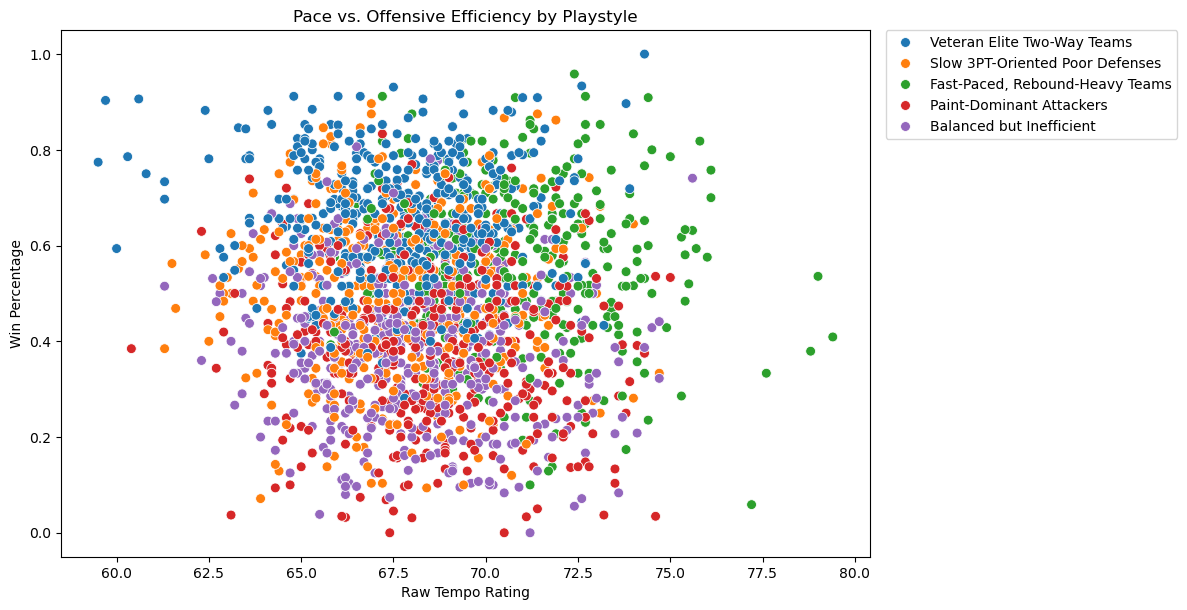

In [13]:
# Create a wider figure
plt.figure(figsize=(12, 6))

ax = sns.scatterplot(
    data=EDA_AllSeasons_DF_test,
    x='raw_tempo_rating',
    y='win_pct',
    hue='playstyle_name',
    palette='tab10',
    s=50
)

# Move the legend outside to the right
ax.legend(
    loc='upper left',          # position of the legend’s anchor point
    bbox_to_anchor=(1.02, 1),  # x, y coordinates to place that anchor
    borderaxespad=0            # padding between axes and legend
)

# Tighten layout so labels aren’t cut off
plt.tight_layout()

plt.title("Pace vs. Offensive Efficiency by Playstyle")
plt.xlabel("Raw Tempo Rating")
plt.ylabel("Win Percentage")
plt.show()

In [14]:
list(EDA_AllSeasons_DF_test.columns)

['season',
 'team_id',
 'team_name',
 'conference',
 'games_played',
 'wins',
 'win_pct',
 'avg_fgm',
 'avg_fga',
 'avg_fgm3',
 'avg_fga3',
 'avg_ftm',
 'avg_fta',
 'avg_orb',
 'avg_drb',
 'avg_ast',
 'avg_to',
 'avg_stl',
 'avg_blk',
 'avg_pf',
 'avg_pts_for',
 'avg_pts_ag',
 'coach_change',
 'avgHeightOnCourt_MinutesWeighted',
 'avgHeightOnCourt_MinutesWeighted_Rank',
 'avgCenterHeight',
 'avgCenterHeight_Rank',
 'avgPowerForwardHeight',
 'avgPowerForwardHeight_Rank',
 'avgSmallForwardHeight',
 'avgSmallForwardHeight_Rank',
 'avgShootingGuardHeight',
 'avgShootingGuardHeight_Rank',
 'avgPointGuardHeight',
 'avgPointGuardHeight_Rank',
 'heightEfficiencyRating',
 'heightEfficiencyRating_Rank',
 'avgYearsOfExperience',
 'avgYearsOfExperience_Rank',
 'avgBenchPoints',
 'avgBenchPoints_Rank',
 'avgCenterPoints',
 'avgCenterPoints_Rank',
 'avgPowerForwardPoints',
 'avgPowerForwardPoints_Rank',
 'avgSmallForwardPoints',
 'avgSmallForwardPoints_Rank',
 'avgShootingGuardPoints',
 'avgShooting

In [15]:
# See NA counts in EDA_AllSeasons_DF_test
EDA_AllSeasons_DF_test.isna().sum()


season                                        0
team_id                                       0
team_name                                     0
conference                                   19
games_played                                 19
                                             ..
adjusted_defensive_efficiency_rating_rank     0
raw_defensive_efficiency_rating               0
raw_defensive_efficiency_rating_rank          0
playstyle                                    19
playstyle_name                               19
Length: 101, dtype: int64

In [16]:
# Drop na rows in EDA_AllSeasons_DF_test
EDA_AllSeasons_DF_test = EDA_AllSeasons_DF_test.dropna()

In [46]:
# Confirm that there are no NA counts in EDA_AllSeasons_DF_test
list(EDA_AllSeasons_DF_test.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [17]:
# See datatypes in EDA_AllSeasons_DF_test
EDA_AllSeasons_DF_test.dtypes

season                                         int64
team_id                                        int64
team_name                                     object
conference                                    object
games_played                                 float64
                                              ...   
adjusted_defensive_efficiency_rating_rank    float64
raw_defensive_efficiency_rating              float64
raw_defensive_efficiency_rating_rank         float64
playstyle                                     object
playstyle_name                                object
Length: 101, dtype: object

In [18]:
# See all non numeric columns
EDA_AllSeasons_DF_test_nonNumeric = EDA_AllSeasons_DF_test.select_dtypes(exclude=[np.number])

EDA_AllSeasons_DF_test_nonNumeric

,team_name,conference,playstyle,playstyle_name
0,abilene christian,southland,2,Veteran Elite Two-Way Teams
1,air force,mwc,0,Slow 3PT-Oriented Poor Defenses
2,akron,mac,1,"Fast-Paced, Rebound-Heavy Teams"
3,alabama,sec,1,"Fast-Paced, Rebound-Heavy Teams"
4,alabama a&m,swac,4,Paint-Dominant Attackers
...,...,...,...,...
2201,wyoming,mwc,3,Balanced but Inefficient
2202,xavier,big_east,2,Veteran Elite Two-Way Teams
2203,yale,ivy,0,Slow 3PT-Oriented Poor Defenses
2204,yale,ivy,0,Slow 3PT-Oriented Poor Defenses


In [19]:
# Just for sake of redundancy and mental peace
# Set team_name, conference, playstyle_name as strings
EDA_AllSeasons_DF_test['team_name'] = EDA_AllSeasons_DF_test['team_name'].astype(str)
EDA_AllSeasons_DF_test['conference'] = EDA_AllSeasons_DF_test['conference'].astype(str)
EDA_AllSeasons_DF_test['playstyle_name'] = EDA_AllSeasons_DF_test['playstyle_name'].astype(str)

# Set playstyle as integer
EDA_AllSeasons_DF_test['playstyle'] = EDA_AllSeasons_DF_test['playstyle'].astype(int)


In [53]:
# See datatypes in EDA_AllSeasons_DF_test
dict(EDA_AllSeasons_DF_test.dtypes)

{'season': dtype('int64'),
 'team_id': dtype('int64'),
 'team_name': dtype('O'),
 'conference': dtype('O'),
 'games_played': dtype('float64'),
 'wins': dtype('float64'),
 'win_pct': dtype('float64'),
 'avg_fgm': dtype('float64'),
 'avg_fga': dtype('float64'),
 'avg_fgm3': dtype('float64'),
 'avg_fga3': dtype('float64'),
 'avg_ftm': dtype('float64'),
 'avg_fta': dtype('float64'),
 'avg_orb': dtype('float64'),
 'avg_drb': dtype('float64'),
 'avg_ast': dtype('float64'),
 'avg_to': dtype('float64'),
 'avg_stl': dtype('float64'),
 'avg_blk': dtype('float64'),
 'avg_pf': dtype('float64'),
 'avg_pts_for': dtype('float64'),
 'avg_pts_ag': dtype('float64'),
 'coach_change': dtype('float64'),
 'avgHeightOnCourt_MinutesWeighted': dtype('float64'),
 'avgHeightOnCourt_MinutesWeighted_Rank': dtype('float64'),
 'avgCenterHeight': dtype('float64'),
 'avgCenterHeight_Rank': dtype('float64'),
 'avgPowerForwardHeight': dtype('float64'),
 'avgPowerForwardHeight_Rank': dtype('float64'),
 'avgSmallForwardHe

In [20]:
# Set models directory to export K-Means model
MODELS_DIR = DATA_DIR / "models"
MODELS_DIR.mkdir(parents=True, exist_ok=True)

# 1️⃣ Export with pickle
with open(MODELS_DIR / "kmeans_playstyles_PICKLE.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# 2️⃣ Export with joblib
joblib.dump(kmeans, MODELS_DIR / "kmeans_playstyles_JOBLIB.joblib")

#print(f"Models saved to:\n"
#      f" - {MODELS_DIR/'kmeans_playstyles.pkl'}\n"
#      f" - {MODELS_DIR/'kmeans_playstyles.joblib'}")

['/Users/sathyabalakumar/MyProjects/myWinningWithStabilityDashboard/data/models/kmeans_playstyles_JOBLIB.joblib']

In [21]:
# Export EDA_AllSeasons_DF_test to CSV to finalData folder in data directory
FINAL_DATA_DIR = PROJECT_ROOT / "finalData"
EDA_AllSeasons_DF_test.to_csv(FINAL_DATA_DIR / "team_AllSeasons_df_test.csv", index=False)

# Export conference seasons DataFrame to CSV
CONFSEASONS_DF.to_csv(FINAL_DATA_DIR / "conference_seasons_df.csv", index=False)

print("Ready for the dashboard creation! Data exported successfully.")

Ready for the dashboard creation! Data exported successfully.


In [22]:
# Export EDA_AllSeasons_DF_test as .xlsx to finalData folder in data directory
EDA_AllSeasons_DF_test.to_excel(FINAL_DATA_DIR / "team_AllSeasons_df_test.xlsx", index=False)

# Export conference seasons DataFrame to Excel
CONFSEASONS_DF.to_excel(FINAL_DATA_DIR / "conference_seasons_df.xlsx", index=False)

In [24]:
list(EDA_AllSeasons_DF_test.columns)

['season',
 'team_id',
 'team_name',
 'conference',
 'games_played',
 'wins',
 'win_pct',
 'avg_fgm',
 'avg_fga',
 'avg_fgm3',
 'avg_fga3',
 'avg_ftm',
 'avg_fta',
 'avg_orb',
 'avg_drb',
 'avg_ast',
 'avg_to',
 'avg_stl',
 'avg_blk',
 'avg_pf',
 'avg_pts_for',
 'avg_pts_ag',
 'coach_change',
 'avgHeightOnCourt_MinutesWeighted',
 'avgHeightOnCourt_MinutesWeighted_Rank',
 'avgCenterHeight',
 'avgCenterHeight_Rank',
 'avgPowerForwardHeight',
 'avgPowerForwardHeight_Rank',
 'avgSmallForwardHeight',
 'avgSmallForwardHeight_Rank',
 'avgShootingGuardHeight',
 'avgShootingGuardHeight_Rank',
 'avgPointGuardHeight',
 'avgPointGuardHeight_Rank',
 'heightEfficiencyRating',
 'heightEfficiencyRating_Rank',
 'avgYearsOfExperience',
 'avgYearsOfExperience_Rank',
 'avgBenchPoints',
 'avgBenchPoints_Rank',
 'avgCenterPoints',
 'avgCenterPoints_Rank',
 'avgPowerForwardPoints',
 'avgPowerForwardPoints_Rank',
 'avgSmallForwardPoints',
 'avgSmallForwardPoints_Rank',
 'avgShootingGuardPoints',
 'avgShooting